In [48]:
#First, I will upload the dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/master/births.csv'
df = pd.read_csv(url)
print('Dataset properly loaded!')

Dataset properly loaded!


In [49]:
#Now, I want to take a look of the data types
df.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [50]:
#Let me see if there are any nulls in the dataset:
df.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [51]:
#The values are usually floats with no decimals, so I will make some adjustments:
df['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

In [52]:
#First, I will rename the "nan" with zeroes:
df['day'].fillna(0, inplace=True)

#I will also change the datatype to "int":
df['day'] = df['day'].astype(int)

In [53]:
#Now, I would like to have births ordered by decade. In this sense:
df['decade'] = 10 * (df['year'] // 10)
df.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(df.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


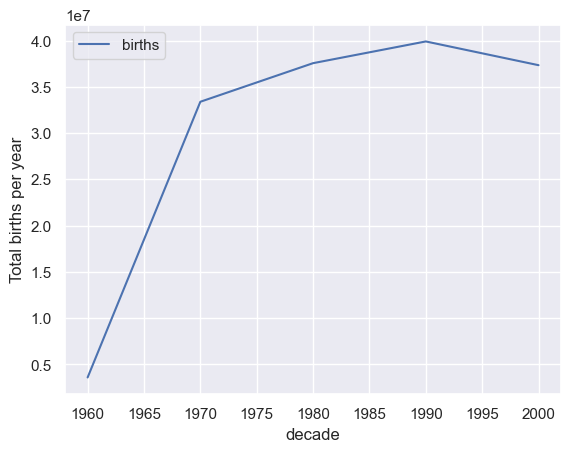

In [68]:
#I want to see the total amount of human beings born:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = df.pivot_table('births', index='decade', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()

In [60]:
#A negative observation is seen near the 90s decade. In this sense, a prediction ML algorithm is going to be used 
# in order to draw a tendency.
#I will build a new dataframe
new_df = df[['year', 'births']]

In [61]:
# I will group births by year:
new_df = new_df.groupby('year', as_index=False).sum()

In [62]:
#Just checking both columns are integers:
new_df.dtypes

year      int64
births    int64
dtype: object

In [63]:
max = new_df['year'].max()
min = new_df['year'].min()

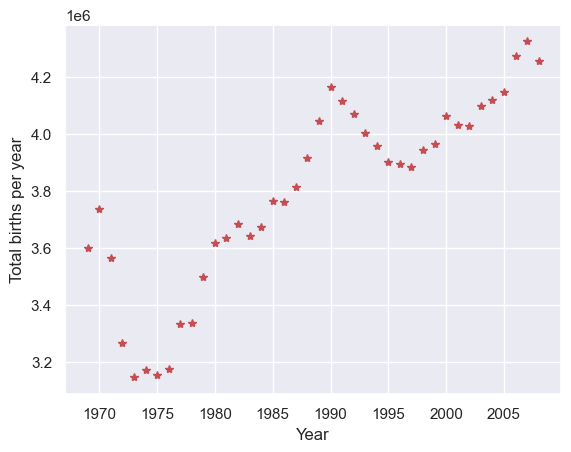

In [64]:
#I will plot this new dataframe in order to evaluate a tendency
plt.plot(new_df['year'], new_df['births'], '*', c='r') 
plt.ylabel("Total births per year") 
plt.xlabel("Year")
plt.show()

In [29]:
# I will import the libraries needed in order to fit the data to a polynomial regression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
x = np.arange(min, max)
poly = PolynomialFeatures(degree=3, include_bias=False) #I estimate a third degree would make a good fit
poly_features = poly.fit_transform(x.reshape(-1, 1))

In [30]:
#We need to create the linear regression in order to fit:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, new_df['births'])

LinearRegression()

In [31]:
#Predicted values
y_predicted = poly_reg_model.predict(poly_features)

In [42]:
#I also want to know the predictions for 2008 onwards:
x_new = np.arange(2009, 2025)
poly_features1 = poly.fit_transform(x_new.reshape(-1, 1))
y_predicted1 = poly_reg_model.predict(poly_features1)

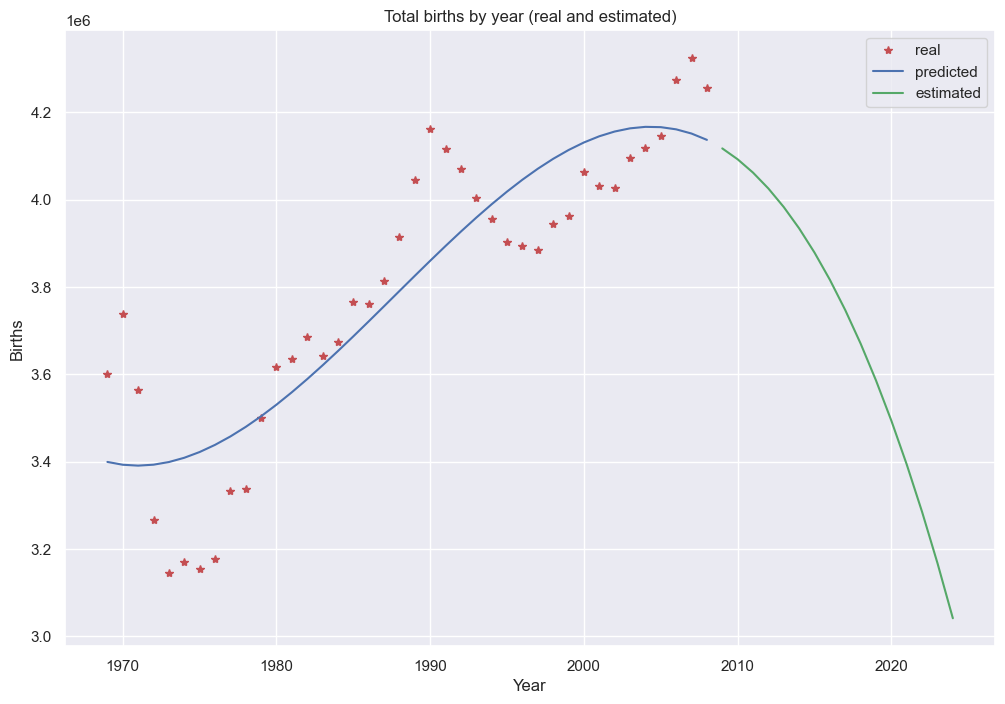

In [65]:
#Finally, I will plot the results
plt.figure(figsize=(12,8))
plt.title('Total births by year (real and estimated)')
plt.plot(new_df['year'], new_df['births'], '*', c='r', label='real')
plt.plot(x,y_predicted, label='predicted')
plt.plot(x_new,y_predicted1, '-', c='g', label='estimated')
plt.ylabel("Births") 
plt.xlabel("Year")
plt.legend()
plt.show()